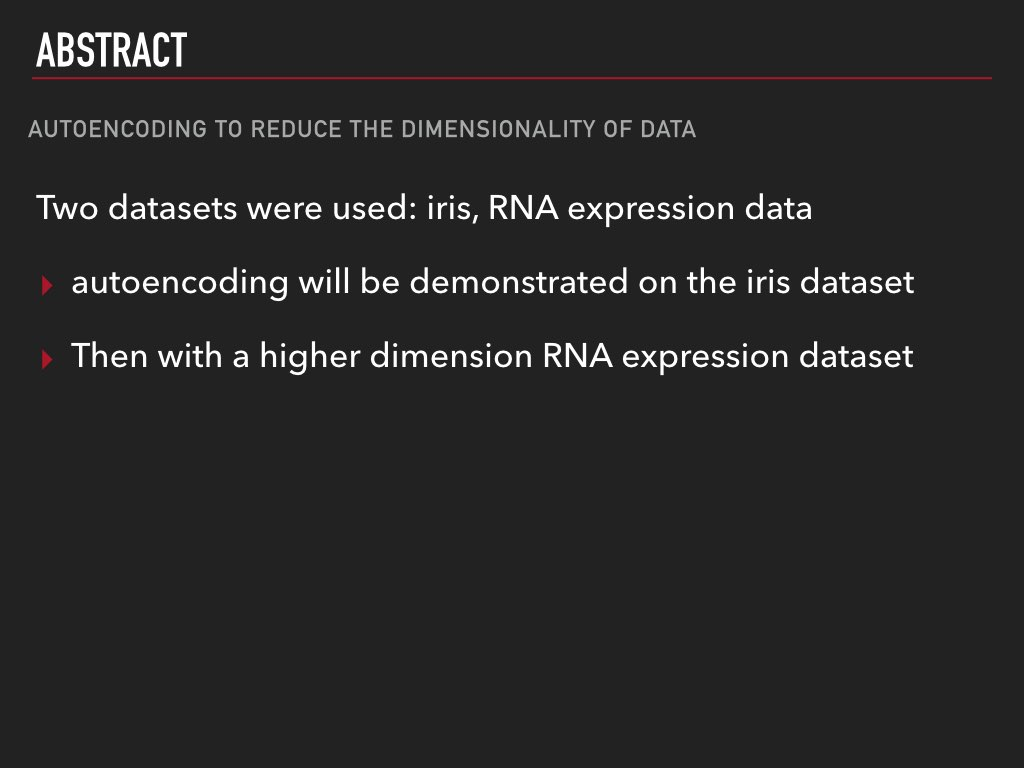

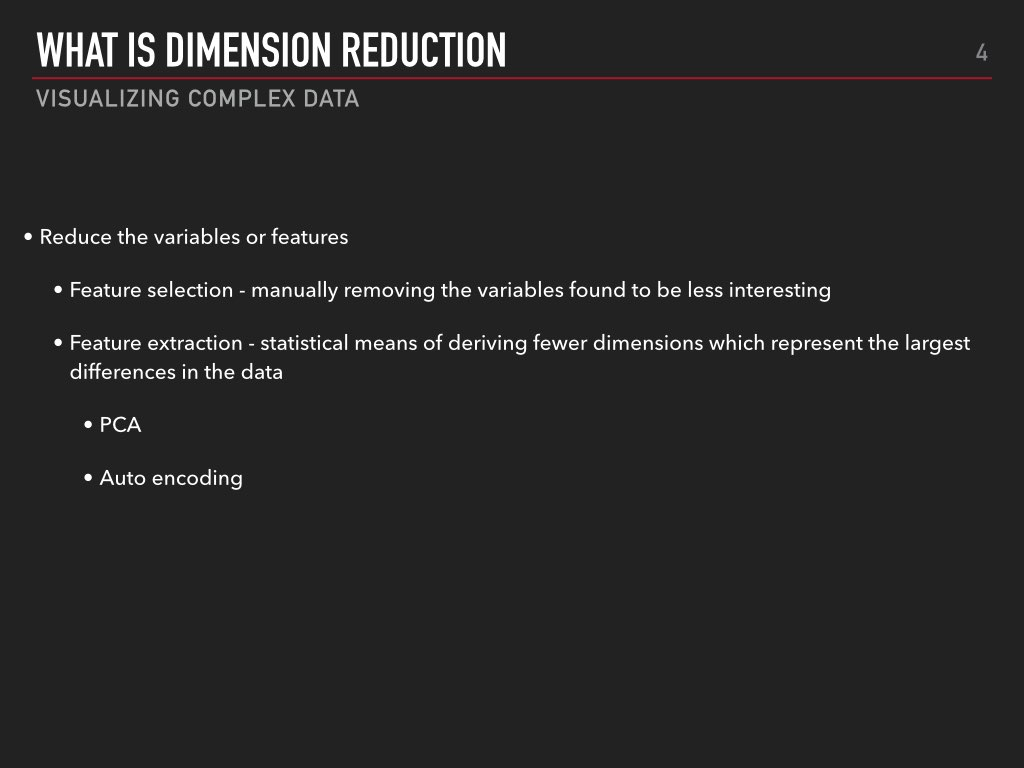

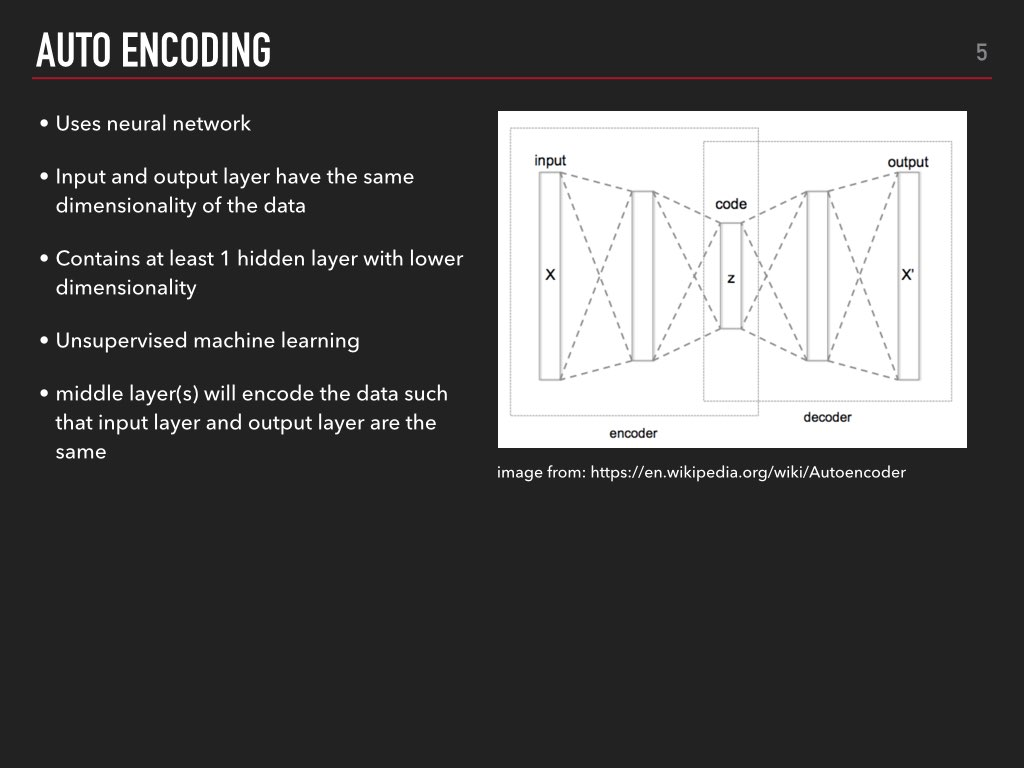

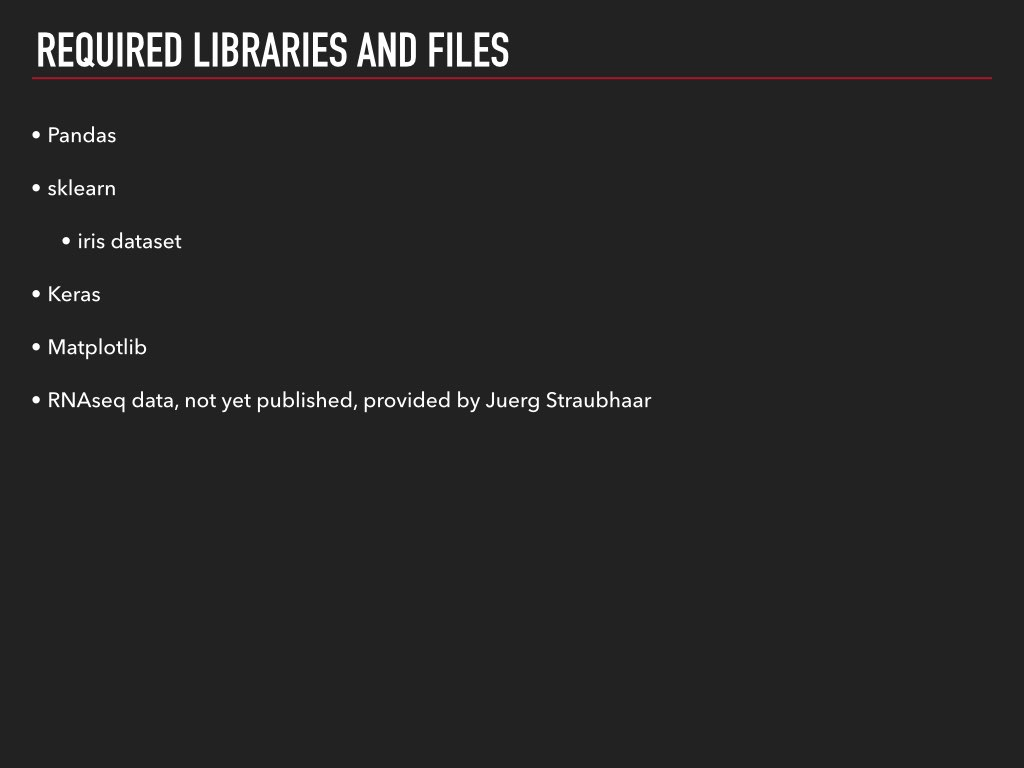

Step 1: Explore autoencoding using the iris dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from keras.layers import Input, Dense, Activation
from keras.models import Sequential, Model
from keras.models import Model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [28]:
from sklearn.model_selection import train_test_split

# split iris data into train and test
iris = load_iris()
X = iris.data
y = iris.target
display(X)
display(y)
display(X.shape)
display(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42, stratify = y) 
display(X_train.shape)
display(X_test.shape)

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(150, 4)

(150,)

(105, 4)

(45, 4)

In [29]:
# we want to use autoencoding to reduce the dimensions 
# let's reduce to two dimensions for graphing
output_dim = 2  
 
input_dim = X_train.shape[1]

# build model with layers
autoencoder = Sequential()

# encoding layer: takes input and encodes it to fewer dimensions
autoencoder.add(Dense(output_dim,  activation='linear', input_shape=(input_dim, ), name="encoded"))

# decoding layer: takes encoded and decodes it back to original dimensions to match input
autoencoder.add(Dense(input_dim,  activation='linear', name="decoded"))


# build a model that just does the encoding part
encoder = Model(autoencoder.input, autoencoder.get_layer('encoded').output)


In [30]:
# compile the autoencoding model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # other optimizers: adadelta, RMSprop

In [31]:
# fit the model and save the output in history
history = autoencoder.fit(X_train, X_train,
                epochs=100, # this seemed to be plenty of epochs to minimize loss
                batch_size=5, # running with larger batch yeilded worse results
                shuffle=True,
                validation_data=(X_test, X_test))


Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 0s 2ms/step - loss: 26.2725 - val_loss: 21.8301
Epoch 2/100
105/105 [==============================] - 0s 774us/step - loss: 21.1490 - val_loss: 20.8286
Epoch 3/100
105/105 [==============================] - 0s 594us/step - loss: 19.9887 - val_loss: 19.2140
Epoch 4/100
105/105 [==============================] - 0s 638us/step - loss: 18.6055 - val_loss: 18.1397
Epoch 5/100
105/105 [==============================] - 0s 606us/step - loss: 17.6028 - val_loss: 16.4998
Epoch 6/100
105/105 [==============================] - 0s 581us/step - loss: 11.3006 - val_loss: 3.6006
Epoch 7/100
105/105 [==============================] - 0s 541us/step - loss: 0.8746 - val_loss: -0.3028
Epoch 8/100
105/105 [==============================] - 0s 667us/step - loss: -0.8472 - val_loss: -0.8733
Epoch 9/100
105/105 [==============================] - 0s 672us/step - loss: -1.2557 - val_loss: -1.1537
Epoch 10/100
1

Epoch 77/100
105/105 [==============================] - 0s 570us/step - loss: -13.3658 - val_loss: -12.6426
Epoch 78/100
105/105 [==============================] - 0s 517us/step - loss: -13.3659 - val_loss: -12.6426
Epoch 79/100
105/105 [==============================] - 0s 605us/step - loss: -13.3659 - val_loss: -12.6427
Epoch 80/100
105/105 [==============================] - 0s 619us/step - loss: -13.3660 - val_loss: -12.6428
Epoch 81/100
105/105 [==============================] - 0s 603us/step - loss: -13.3661 - val_loss: -12.6429
Epoch 82/100
105/105 [==============================] - 0s 573us/step - loss: -13.3662 - val_loss: -12.6432
Epoch 83/100
105/105 [==============================] - 0s 576us/step - loss: -13.3685 - val_loss: -12.6433
Epoch 84/100
105/105 [==============================] - 0s 614us/step - loss: -13.3685 - val_loss: -12.6433
Epoch 85/100
105/105 [==============================] - 0s 602us/step - loss: -13.3685 - val_loss: -12.6433
Epoch 86/100
105/105 [======

In [32]:
# capture the results by passing them through the encoder
encoded_res = encoder.predict(X_test)
display(encoded_res)

array([[-3.58632946,  2.31264567],
       [-3.08519769,  1.78533208],
       [-3.16417527,  1.91186368],
       [-3.38309121,  1.84181392],
       [-3.37872148,  1.89438593],
       [-3.83330059,  2.10969329],
       [-2.55477238,  1.39255166],
       [-2.54267406,  1.38715065],
       [-2.04798698,  0.60015589],
       [-3.6151793 ,  1.80578482],
       [-2.2018342 ,  0.41744322],
       [-1.81902003,  0.51263207],
       [-3.27712488,  2.07696438],
       [-3.50734138,  2.1135025 ],
       [-1.98367667,  0.49059755],
       [-3.96960783,  2.21830344],
       [-2.34921265,  1.21685731],
       [-2.16502953,  0.58287835],
       [-2.15809059,  0.62387836],
       [-2.28954434,  0.63899064],
       [-2.90951395,  1.557814  ],
       [-2.03871393,  0.59091032],
       [-2.99159145,  1.53753555],
       [-3.7717967 ,  2.24580503],
       [-3.36148477,  1.86584079],
       [-3.20817566,  1.69001186],
       [-3.21636701,  1.87079787],
       [-2.2777071 ,  1.16371548],
       [-3.1911664 ,

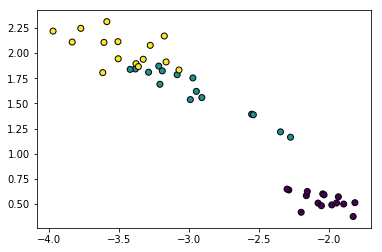

In [33]:
# plot the encoded clusters colored by target
plt.scatter(encoded_res[:,0], encoded_res[:,1], c=y_test, edgecolor="black", linewidth=1)
plt.show()

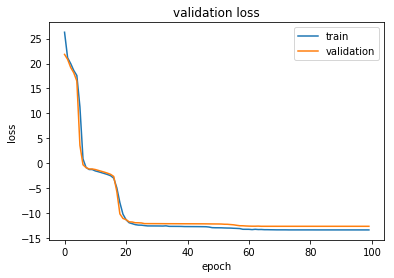

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

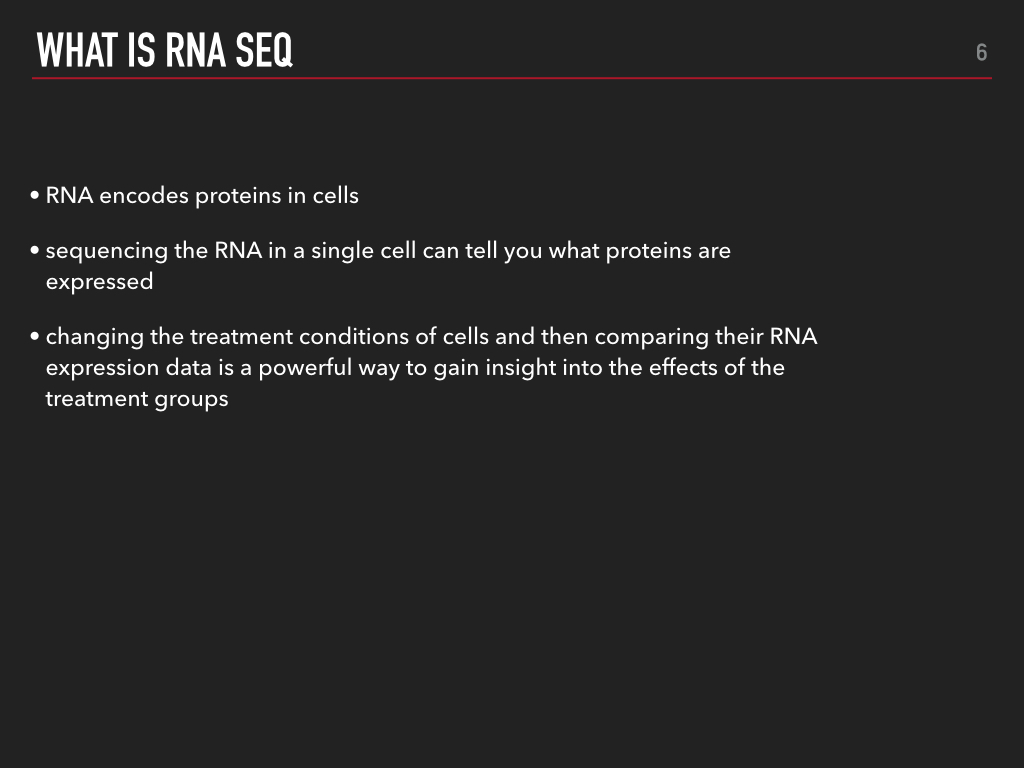

In [90]:
# import the data
rna_seq = pd.read_csv('dataMatrixDimaProj_MeghanMachineLearning.csv', sep = '\t')
display(rna_seq.head())
display(rna_seq.shape)

# index are proteins that the RNA encodes
# columns are the samples (cells under treatment over time)
# numbers are RNA expression levels

,S0c,S1c,S2c,S3c,S4c,S5c
A0A023T6R1,4.666390,4.144578,4.627526,4.178100,4.437334,4.008275
A0A023T787,7.098206,8.277620,7.351506,7.599942,7.638657,7.657223
A0A023UFG1,5.693105,3.183055,-2.516990,-2.976737,2.825229,2.689385
A0A024QYR3,6.915084,7.023018,7.123031,6.628204,7.007944,6.977590
A0A024QYR8,8.810105,9.193332,8.755695,8.672293,8.902094,9.191044


(8763, 6)

In [91]:
rna_seqt = rna_seq.transpose()

In [72]:
# seperate the labels from values
X_rnat = rna_seqt.values
y_rnat = rna_seqt.index.values
display(X_rnat)
display(y_rnat)
display(X_rnat.shape)
display(y_rnat.shape)

array([[ 4.66639045,  7.09820572,  5.69310454, ...,  6.06422831,
         6.17812764,  5.97674885],
       [ 4.1445785 ,  8.27762002,  3.1830549 , ...,  5.86725087,
         5.90023857,  6.85254   ],
       [ 4.6275257 ,  7.35150569, -2.51699   , ...,  6.40254079,
         5.46129318,  6.50452328],
       [ 4.17810031,  7.59994247, -2.97673713, ...,  6.39270865,
         5.91019922,  5.92795654],
       [ 4.4373341 ,  7.63865669,  2.82522914, ...,  6.55275911,
         5.78238155,  6.76614012],
       [ 4.0082754 ,  7.65722298,  2.68938471, ...,  6.01563583,
         6.28918946,  6.4507707 ]])

array(['S0c', 'S1c', 'S2c', 'S3c', 'S4c', 'S5c'], dtype=object)

(6, 8763)

(6,)

In [78]:
# we want to use autoencoding to reduce the dimensions 
# let's reduce to two dimensions for graphing
rna_output_dim = 2  
 
rna_input_dim = X_rnat.shape[1]

# build model with layers
rna_autoencoder = Sequential()

# encoding layer: takes input and encodes it to fewer dimensions
rna_autoencoder.add(Dense(rna_output_dim,  activation='linear', input_shape=(rna_input_dim, ), name="encoded"))

# decoding layer: takes encoded and decodes it back to original dimensions to match input
rna_autoencoder.add(Dense(rna_input_dim,  activation='linear', name="decoded"))

# build a model that just does the encoding part
rna_encoder = Model(rna_autoencoder.input, rna_autoencoder.get_layer('encoded').output)


In [79]:
rna_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [80]:
rna_history = rna_autoencoder.fit(X_rnat, X_rnat,
                epochs=100, 
                batch_size=5, 
                shuffle=True)

Epoch 1/100
6/6 [==============================] - 0s 70ms/step - loss: 44.4559
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 13.6119
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 5.0751
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 1.6956
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: -0.1534
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: -1.6646
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: -3.2468
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: -4.5102
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: -5.5855
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: -6.2333
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: -6.5083
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: -6.6654
Epoch 13/100
6/6 [==============================] 

In [81]:
rna_encoded_res = rna_encoder.predict(X_rnat)
display(rna_encoded_res)

array([[ 533.83837891,  368.65267944],
       [ 540.39233398,  374.08325195],
       [ 541.79046631,  370.79534912],
       [ 546.45074463,  371.88421631],
       [ 548.62445068,  377.31008911],
       [ 547.81829834,  380.02505493]], dtype=float32)

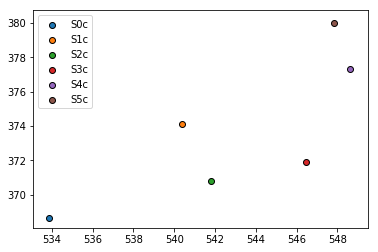

In [82]:
# scatter plot of encoded results
for i, row in enumerate(rna_encoded_res):
    plt.scatter(row[0], row[1], edgecolor="black", linewidth=1, label=y_rnat[i])

plt.legend()
plt.show()

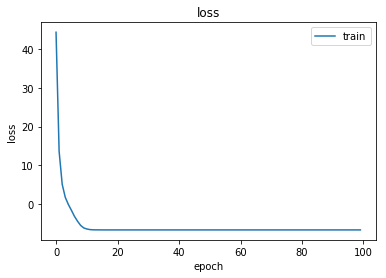

In [83]:
plt.plot(rna_history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

Try a deeper network

In [50]:
# we want to use autoencoding to reduce the dimensions 
# let's reduce to two dimensions for graphing
output_dim_numt = 2  
input_dim_numt = X_rnat.shape[1]

# build model
model = Sequential()
model.add(Dense(512,  activation='relu', input_shape=(input_dim_numt,)))
model.add(Dense(128,  activation='relu'))
model.add(Dense(2,    activation='linear', name="encoder"))
model.add(Dense(128,  activation='relu'))
model.add(Dense(512,  activation='relu'))
model.add(Dense(input_dim_numt,  activation='sigmoid'))



# autoencoder 
autoencoder_rnat = model


encoder = Model(model.input, model.get_layer('encoder').output)

In [51]:
autoencoder_rnat.compile(optimizer='RMSprop', loss='binary_crossentropy')

In [52]:
historyt = autoencoder_rnat.fit(X_rnat, X_rnat,
                epochs=100, 
                batch_size=5, 
                shuffle=True)

Epoch 1/100
6/6 [==============================] - 1s 121ms/step - loss: -10.4579
Epoch 2/100
6/6 [==============================] - 0s 46ms/step - loss: -69.0171
Epoch 3/100
6/6 [==============================] - 0s 47ms/step - loss: -69.0171
Epoch 4/100
6/6 [==============================] - 0s 45ms/step - loss: -69.0171
Epoch 5/100
6/6 [==============================] - 0s 48ms/step - loss: -69.0171
Epoch 6/100
6/6 [==============================] - 0s 47ms/step - loss: -69.0171
Epoch 7/100
6/6 [==============================] - 0s 49ms/step - loss: -69.0171
Epoch 8/100
6/6 [==============================] - 0s 44ms/step - loss: -69.0171
Epoch 9/100
6/6 [==============================] - 0s 48ms/step - loss: -69.0171
Epoch 10/100
6/6 [==============================] - 0s 46ms/step - loss: -69.0171
Epoch 11/100
6/6 [==============================] - 0s 50ms/step - loss: -69.0171
Epoch 12/100
6/6 [==============================] - 0s 47ms/step - loss: -69.0171
Epoch 13/100
6/6 [======

In [45]:
encoded_rna_rest = encoder.predict(X_rnat)
display(encoded_rna_rest)

array([[-2106.16088867,  2692.6875    ],
       [-2134.56298828,  2730.30029297],
       [-2122.1472168 ,  2714.17163086],
       [-2133.59643555,  2730.4453125 ],
       [-2150.97753906,  2749.97485352],
       [-2158.72094727,  2758.48632812]], dtype=float32)

'S0c'

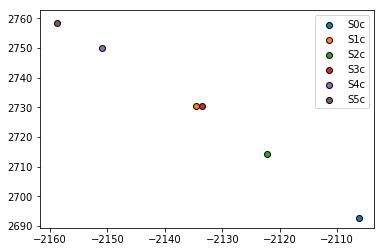

In [53]:
# scatter plot of encoded results
for i, row in enumerate(encoded_rna_rest):
    plt.scatter(row[0], row[1], edgecolor="black", linewidth=1, label=y_rnat[i])

plt.legend()
plt.show()

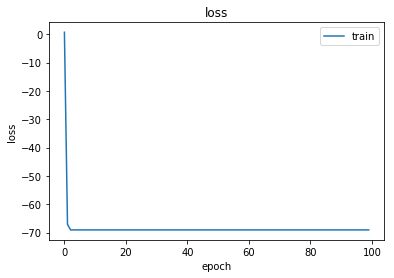

In [47]:
plt.plot(historyt.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

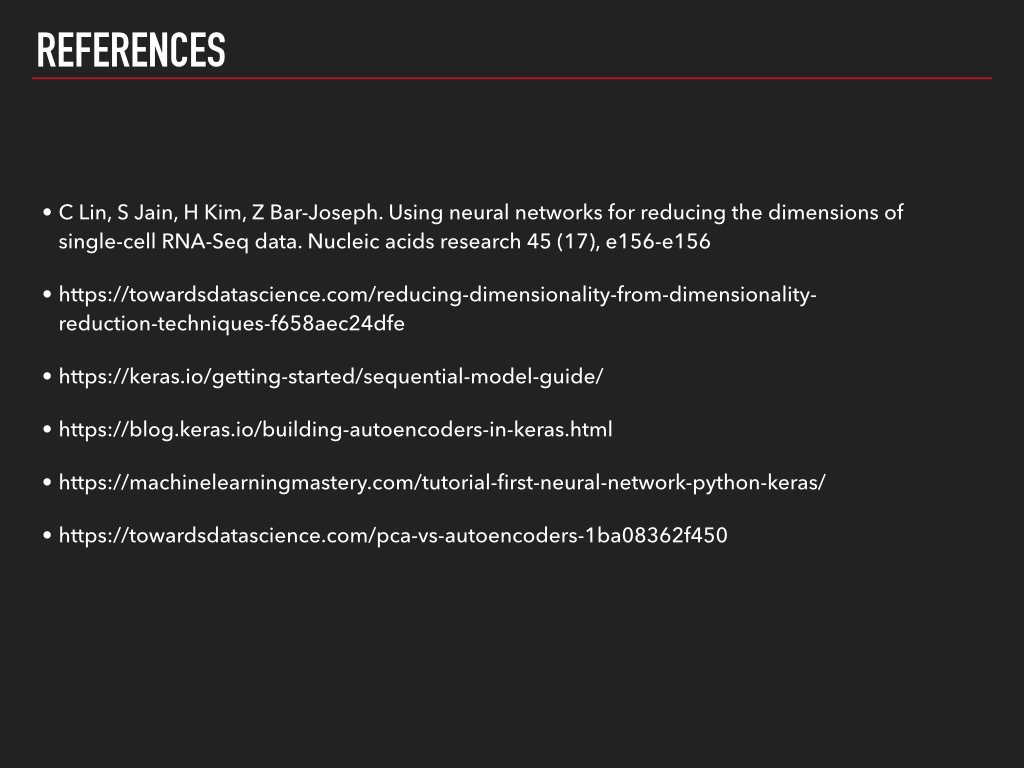